/usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/art3d.py:304: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self._segments3d = np.asanyarray(segments)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


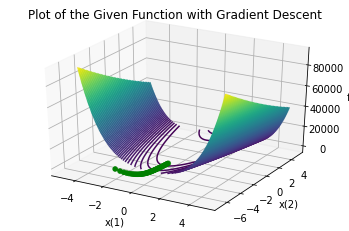

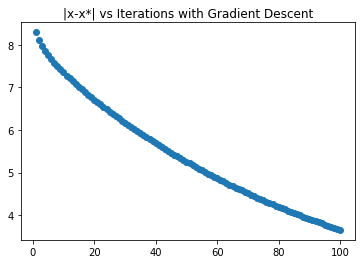

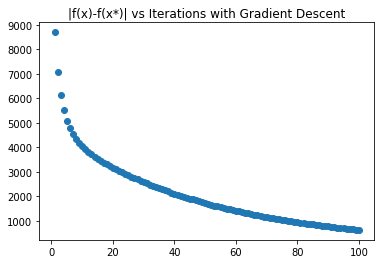

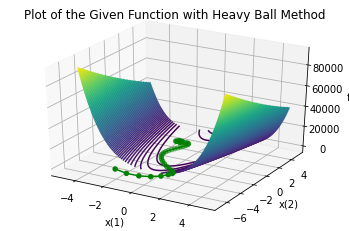

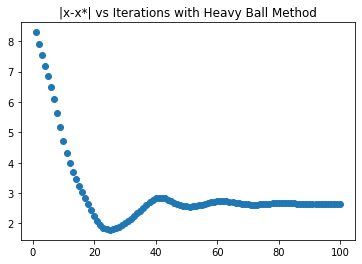

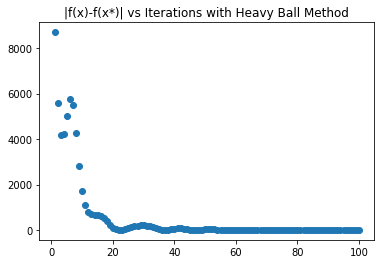

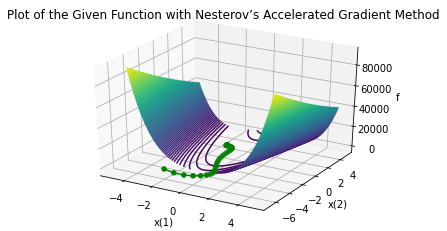

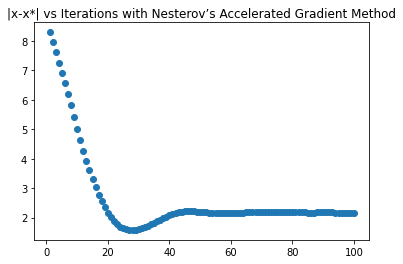

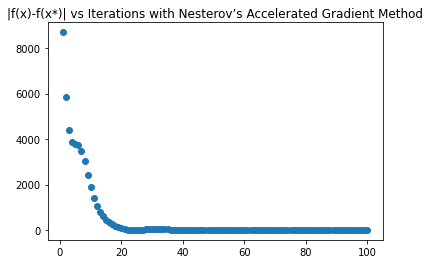

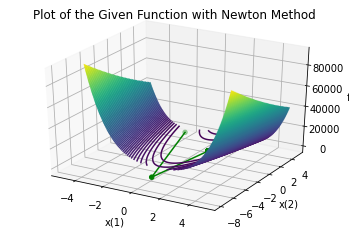

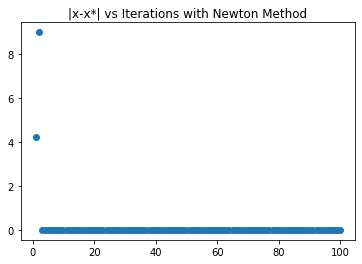

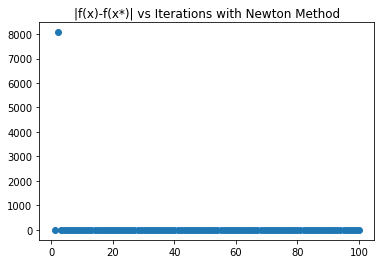

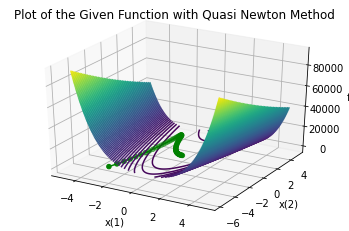

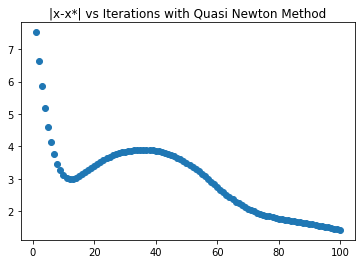

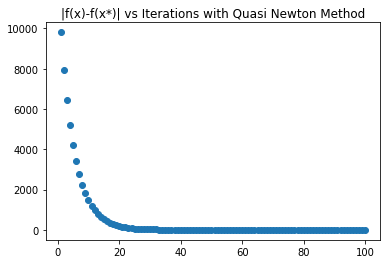

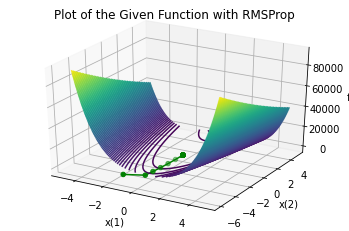

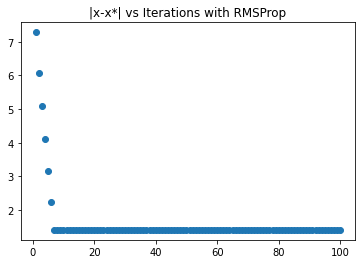

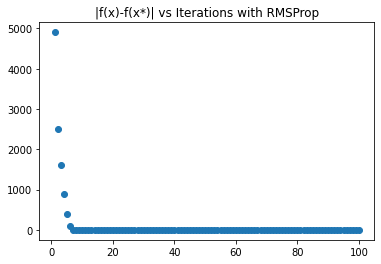

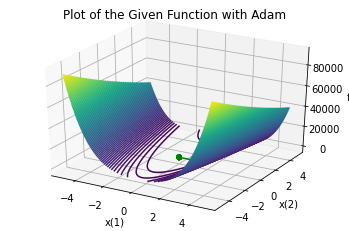

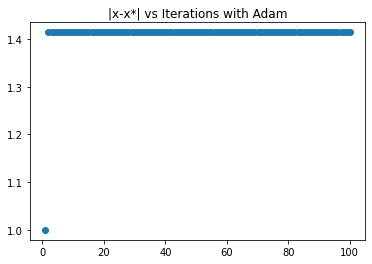

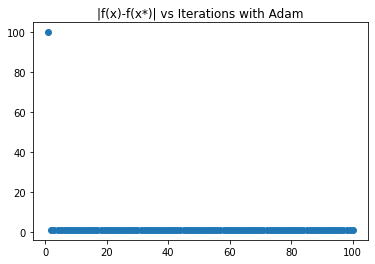

In [86]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import math

def rosenbrock(x,y, a=1, b=100):
    return (a - x)**2 + b * (y - x**2)**2

def rosenbrock_grad(x,y, a=1, b=100):
    return np.array([
        2 * (x - a) - 4 * b * x * (y - x**2),
        2 * b * (y - x**2)
    ])

def rosenbrock_hess(x,y, a=1, b=100):
    return np.matrix([
        [2 - 4 * b * (y - 3 * x**2), -4 * b * x],
        [-4 * b * x, 2 * b]
    ])




def gradient_descent(J_grad, x_init, alpha=0.00005, max_iterations=100):
    x1val=[]
    x2val=[]
    zval=[]
    Error=[]  
    x = x_init
    for i in range(max_iterations):
        x = x - alpha * J_grad(x[0],x[1])
        x1val.append(x[0])
        x2val.append(x[1])
        zval.append(rosenbrock(x[0],x[1]))
        Error.append(math.sqrt(((x[0]-1)**2)+((x[1]-1)**2)))                  
    return x, max_iterations, x1val, x2val, zval, Error   

def Heavy_Ball(J_grad, x_init, alpha=0.00005, max_iterations=100,beta=0.9):
    x1val=[]
    x2val=[]
    zval=[]
    Error=[]  
    x = x_init
    xOld=x
    for i in range(max_iterations):
        xtemp=x
        x = x - alpha * J_grad(x[0],x[1])+beta*(x-xOld)
        x1val.append(x[0])
        x2val.append(x[1])
        zval.append(rosenbrock(x[0],x[1]))
        Error.append(math.sqrt(((x[0]-1)**2)+((x[1]-1)**2)))
        xOld=xtemp                  
    return x, max_iterations, x1val, x2val, zval, Error    

def NAGM(J_grad, x_init, alpha=0.00005, max_iterations=100,beta=0.9):
    x1val=[]
    x2val=[]
    zval=[]
    Error=[]  
    x = x_init
    xOld=x
    for i in range(max_iterations):
        xtemp=x
        x = x - alpha * J_grad((x+beta*(x-xOld))[0],(x+beta*(x-xOld))[1])+beta*(x-xOld)
        x1val.append(x[0])
        x2val.append(x[1])
        zval.append(rosenbrock(x[0],x[1]))
        Error.append(math.sqrt(((x[0]-1)**2)+((x[1]-1)**2)))
        xOld=xtemp                  
    return x, max_iterations, x1val, x2val, zval, Error

def newton(J_grad, J_hess, x_init, max_iterations=100):
    x1val=[]
    x2val=[]
    zval=[]
    Error=[]
    x = x_init
    for i in range(max_iterations):
        x = x - np.linalg.solve(J_hess(x[0],x[1]), J_grad(x[0],x[1]))
        x1val.append(x[0])
        x2val.append(x[1])
        zval.append(rosenbrock(x[0],x[1]))
        Error.append(math.sqrt(((x[0]-1)**2)+((x[1]-1)**2)))      
    return x, max_iterations, x1val, x2val, zval,Error    

def Qnewton(J_grad, J_hess, x_init, max_iterations=100,alpha=0.1):
    x1val=[]
    x2val=[]
    zval=[]
    Error=[]
    x = x_init
    for i in range(max_iterations):
        x = x - alpha*np.linalg.solve(J_hess(x[0],x[1]), J_grad(x[0],x[1]))
        x1val.append(x[0])
        x2val.append(x[1])
        zval.append(rosenbrock(x[0],x[1]))
        Error.append(math.sqrt(((x[0]-1)**2)+((x[1]-1)**2)))      
    return x, max_iterations, x1val, x2val, zval,Error     

def RMS(J_grad, x_init, alpha=0.00005, max_iterations=100,beta=0.9):
    x1val=[]
    x2val=[]
    zval=[]
    Error=[]
    v=np.zeros(2)  
    x = x_init
    for i in range(max_iterations):
        v[0]=beta*v[0]+(1-beta)*(((J_grad(x[0],x[1]))[0])**2)
        v[1]=beta*v[1]+(1-beta)*(((J_grad(x[0],x[1]))[1])**2)        
        x[0] = x[0] - (alpha * J_grad(x[0],x[1])[0])/math.sqrt(v[0])
        x[1] = x[1] - (alpha * J_grad(x[0],x[1])[1])/math.sqrt(v[1])        
        x1val.append(x[0])
        x2val.append(x[1])
        zval.append(rosenbrock(x[0],x[1]))
        Error.append(math.sqrt(((x[0]-1)**2)+((x[1]-1)**2)))              
    return x, max_iterations, x1val, x2val, zval, Error

def Adam(J_grad, x_init, alpha=0.5, max_iterations=100,beta1=0.9,beta2=0.9,epsilon=0.1):
    x1val=[]
    x2val=[]
    zval=[]
    Error=[]
    v=np.zeros(2)
    v0=np.zeros(2)  
    x = x_init
    count=0
    m=np.zeros(2)
    for i in range(max_iterations):
        count=count+1
        m=beta1*m+(1-beta1)*((J_grad(x[0],x[1])))
        v[0]=beta2*v[0]+(1-beta2)*(((J_grad(x[0],x[1]))[0])**2)
        v[1]=beta2*v[1]+(1-beta2)*(((J_grad(x[0],x[1]))[1])**2) 
        m0=m/(1-pow(beta1,count)) 
        v0[0]=v[0]/(1-pow(beta2,count))
        v0[1]=v[1]/(1-pow(beta2,count))             
        x[0] = x[0] - (alpha * (m0[0]/(math.sqrt(v[0]) + epsilon))) 
        x[1] = x[1] - (alpha * (m0[1]/(math.sqrt(v[1]) + epsilon)))       
        x1val.append(x[0])
        x2val.append(x[1])
        zval.append(rosenbrock(x[0],x[1]))
        Error.append(math.sqrt(((x[0]-1)**2)+((x[1]-1)**2)))              
    return x, max_iterations, x1val, x2val, zval, Error    



def plot3d(x1,x2,z,Error,max_iterations,optimization):
 fig = plt.figure()
 ax = plt.axes(projection='3d')
 ax.set_title('Plot of the Given Function with %s' %optimization)
 ax.contour3D(X1, X2, Z,  100)
 ax.set_xlabel('x(1)')
 ax.set_ylabel('x(2)')
 ax.set_zlabel('f');
 ax.scatter3D(x1, x2, z, color = "green")
 ax.plot3D(x1, x2, z, color = "green")
 fig =plt.figure()
 r=list(range(1, max_iterations+1))
 plt.scatter(r, Error)
 plt.title("|x-x*| vs Iterations with %s" %optimization)
 fig =plt.figure()  
 plt.scatter(r, z) 
 plt.title("|f(x)-f(x*)| vs Iterations with %s" %optimization)

x1 = np.linspace(-5,5,2000)
x2 = np.linspace(-5,5,2000)
X1,X2 = np.meshgrid(x1, x2) # grid of point

Z = rosenbrock(X1,X2)



x_init = np.array([-2,-7])
x_min_G, it_G, x1G, x2G, zG, eG = gradient_descent(rosenbrock_grad, x_init)
x_min_B, it_B, x1B, x2B, zB, eB = Heavy_Ball(rosenbrock_grad, x_init)
x_min_NAGM, it_NAGM, x1NAGM, x2NAGM, zNAGM, eNAGM = NAGM(rosenbrock_grad, x_init)
x_min, it, x1N, x2N, zN, eN = newton(rosenbrock_grad, rosenbrock_hess, x_init)
x_min_QN, it_QN, x1QN, x2QN, zQN, eQN = Qnewton(rosenbrock_grad, rosenbrock_hess, x_init)
x_min_RMS, it_RMS, x1RMS, x2RMS, zRMS, eRMS = RMS(rosenbrock_grad, x_init)
x_min_Adam, it_Adam, x1Adam, x2Adam, zAdam, eAdam = Adam(rosenbrock_grad, x_init)

plot3d(x1G,x2G,zG,eG,it_G,"Gradient Descent")
plot3d(x1B,x2B,zB,eB,it_B,"Heavy Ball Method")
plot3d(x1NAGM, x2NAGM, zNAGM, eNAGM, it_NAGM,"Nesterov’s Accelerated Gradient Method")
plot3d(x1N,x2N,zN,eN,it,"Newton Method")
plot3d(x1QN, x2QN, zQN, eQN, it_QN, "Quasi Newton Method")
plot3d(x1RMS, x2RMS, zRMS, eRMS, it_RMS, "RMSProp")
plot3d(x1Adam, x2Adam, zAdam, eAdam, it_Adam,"Adam")